# Predicting the Loan Defaulters with Random Forest 

For this project we will be exploring publicly available data from [LendingClub.com](www.lendingclub.com). Lending Club connects people who need money (borrowers) with people who have money (investors). Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back. We will try to create a model that will help predict this.

Lending club had a [very interesting year in 2016](https://en.wikipedia.org/wiki/Lending_Club#2016), so let's check out some of their data and keep the context in mind. This data is from before they even went public.

We will use lending data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full. You can download the data from [here](https://www.lendingclub.com/info/download-data.action) or just use the csv already provided. It's recommended you use the csv provided as it has been cleaned of NA values.

Here are what the columns represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [10]:
loans = pd.read_csv(r"loan_data.csv")

In [11]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [12]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [15]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


## Exploratory Data Analysis

Text(0.5, 0, 'FICO')

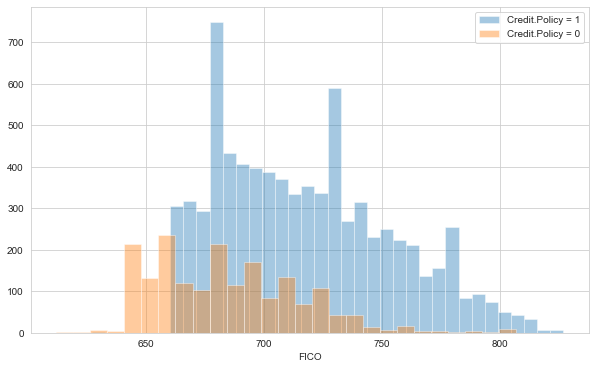

In [40]:
# Creating a visuvalization,by selecting the not "credit.policy" column.
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
sns.distplot(loans[loans['credit.policy']==1]['fico'],kde=False,label='Credit.Policy = 1')
sns.distplot(loans[loans['credit.policy']==0]['fico'],kde=False,label='Credit.Policy = 0')
plt.legend()
plt.xlabel('FICO')

**Observation**: More number of people have a credit policy. Based on FICO score, people who have low FICO score tend to not have a credit policy. Notice a cut off point where the people who have FICO score around 650 do not have a policy at all.

Text(0.5, 0, 'FICO')

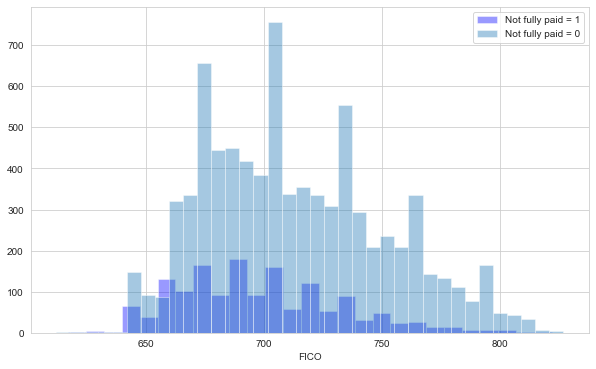

In [51]:
# Creating a similar figure, except this time selected by the "not.fully.paid" column.
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
sns.distplot(loans[loans['not.fully.paid']==1]['fico'],kde=False,label='Not fully paid = 1',color="b")
sns.distplot(loans[loans['not.fully.paid']==0]['fico'],kde=False,label='Not fully paid = 0')
plt.legend()
plt.xlabel('FICO')

**Observation**: Following points can be noticed from the above graph:
- Both the distrubutions are almost the same.
- More number of people have not fully paid their loans. 

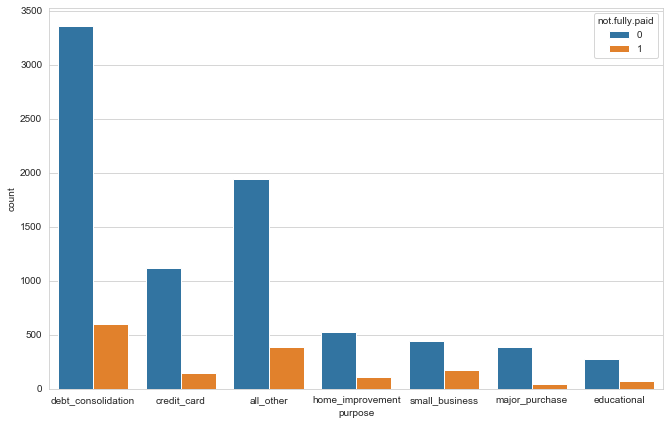

In [46]:
# Creating a countplot using seaborn showing the counts of loans by purpose, with the color hue defined by not.fully.paid.
plt.figure(figsize=(11,7))
sns.countplot(loans["purpose"],hue = loans["not.fully.paid"])

**Observation**: From the above graph, debt consolidation seems to be the most popular reason for availing loans

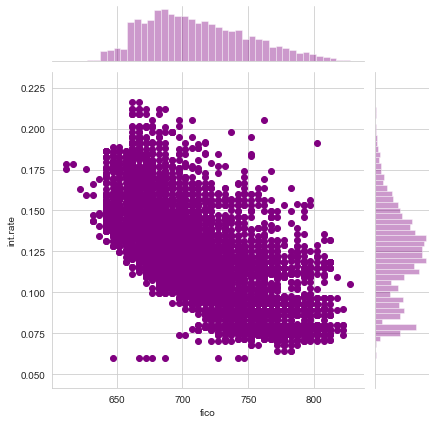

In [62]:
# Creating a trend between FICO score and interest rate with jointplot.
sns.jointplot(x="fico",y="int.rate",data=loans,color="purple")

**Observation**: From the graph above, we can see that as the FICO score increases, the interest rate decreases.

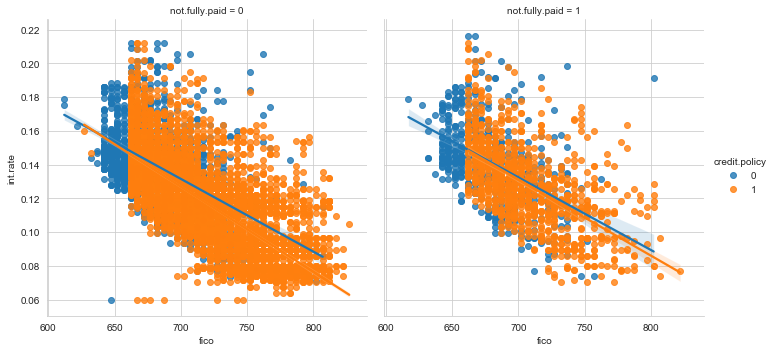

In [84]:
# Creating lmplots to see if the trend differed between not.fully.paid and credit.policy.
sns.lmplot(data=loans,x="fico",y="int.rate",hue = "credit.policy",col="not.fully.paid")

**Observation**: The behavious of both the graphs are very similar even when the credit policies are different.

## Setting up the Data for Random Forest Classification Model

In [86]:
# Checking loans.info() again
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


**Observation**: Notice that the "purpose" column is categorical.

In [90]:
# Transforming categorical using dummy variables so sklearn can interpret them
final_data = pd.get_dummies(loans,columns=["purpose"],drop_first=False)

## Train Test Split

In [92]:
# Importing train test split for splitting the dataset accordingly
from sklearn.model_selection import train_test_split 

In [95]:
final_data.columns

Index(['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid',
       'purpose_all_other', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_major_purchase',
       'purpose_small_business'],
      dtype='object')

In [96]:
X = final_data.drop("not.fully.paid",axis=1)
y = final_data["not.fully.paid"]

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Training a Decision Tree Model

In [98]:
# Importing DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

**Create an instance of DecisionTreeClassifier() called dtree and fit it to the training data.**

In [100]:
# Creating an instance for the decision tree classfier 
dtree = DecisionTreeClassifier()

In [102]:
# Fitting the train datasets into the selected model
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## Predictions

In [104]:
predictions = dtree.predict(X_test)

## Evaluation of Decision Tree

In [106]:
# Importing the classification report and confusion matrix for evaluation
from sklearn.metrics import classification_report,confusion_matrix 

In [112]:
print("Classification Report:")
print(classification_report(y_test,predictions))
print("Confusion Matrix:")
print(confusion_matrix(y_test,predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.81      0.83      2431
           1       0.20      0.25      0.22       443

    accuracy                           0.73      2874
   macro avg       0.53      0.53      0.53      2874
weighted avg       0.75      0.73      0.74      2874

Confusion Matrix:
[[1974  457]
 [ 332  111]]


**Observation**: The accuracy is very low in this case with decision tree model

## Training the Random Forest model

In [114]:
# Importing the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

In [146]:
# Creating instance
forest = RandomForestClassifier(n_estimators=320)

In [147]:
# Fitting the model onto the dataset
forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=320,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## Predictions

In [148]:
predictions2 = forest.predict(X_test)

**Now create a classification report from the results. Do you get anything strange or some sort of warning?**

In [149]:
# Creating classification report and confusion matrix again for the new model
print("Classification Report:")
print(classification_report(y_test,predictions2))
print("Confusion Matrix:")
print(confusion_matrix(y_test,predictions2))

Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.53      0.02      0.04       443

    accuracy                           0.85      2874
   macro avg       0.69      0.51      0.48      2874
weighted avg       0.80      0.85      0.78      2874

Confusion Matrix:
[[2422    9]
 [ 433   10]]


**Random Forest Classifier performed better from the observations**